<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.668006,43.623174,57.359934,-135.381776,57.269337,196.625618,-139.356281
1,0.0,1.0,86.838141,99.779289,20.191651,9.954097,226.763179,229.878347,-3.115168
2,0.0,2.0,24.214903,92.342839,57.583852,-31.076277,153.065316,174.529876,-21.464560
3,0.0,3.0,38.406655,48.857390,90.541274,-5.816363,181.988955,179.920497,2.068458
4,0.0,4.0,89.554468,94.303837,61.551255,-4.326059,251.083500,275.781937,-24.698436
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.935568,82.475526,20.742621,48.263107,240.416823,168.662656,71.754166
59996,999.0,56.0,62.484980,31.122712,26.298562,21.522034,151.428288,131.642178,19.786110
59997,999.0,57.0,71.722205,55.049330,92.510632,114.316236,343.598403,209.685931,133.912471
59998,999.0,58.0,70.368138,61.499791,78.115273,79.755872,299.739074,200.793375,98.945699


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.668006,43.623174,57.359934,-135.381776,57.269337,196.625618,-139.356281
1,0.0,1.0,86.838141,99.779289,20.191651,9.954097,226.763179,229.878347,-3.115168
2,0.0,2.0,24.214903,92.342839,57.583852,-31.076277,153.065316,174.529876,-21.464560
3,0.0,3.0,38.406655,48.857390,90.541274,-5.816363,181.988955,179.920497,2.068458
4,0.0,4.0,89.554468,94.303837,61.551255,-4.326059,251.083500,275.781937,-24.698436
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.935568,82.475526,20.742621,48.263107,240.416823,168.662656,71.754166
59996,999.0,56.0,62.484980,31.122712,26.298562,21.522034,151.428288,131.642178,19.786110
59997,999.0,57.0,71.722205,55.049330,92.510632,114.316236,343.598403,209.685931,133.912471
59998,999.0,58.0,70.368138,61.499791,78.115273,79.755872,299.739074,200.793375,98.945699


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    81.668006  43.623174  ...  196.625618 -139.356281
      1.0    86.838141  99.779289  ...  229.878347   -3.115168
      2.0    24.214903  92.342839  ...  174.529876  -21.464560
      3.0    38.406655  48.857390  ...  179.920497    2.068458
      4.0    89.554468  94.303837  ...  275.781937  -24.698436
...                ...        ...  ...         ...         ...
999.0 55.0   78.935568  82.475526  ...  168.662656   71.754166
      56.0   62.484980  31.122712  ...  131.642178   19.786110
      57.0   71.722205  55.049330  ...  209.685931  133.912471
      58.0   70.368138  61.499791  ...  200.793375   98.945699
      59.0   78.087911  22.529705  ...  158.370518  -38.200506

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    81.668006  43.623174  ...  196.625618 -139.356281
      1.0    86.838141  99.779289  ...  229.878347   -3.115168
      2.0    24.214903  92.342839  ...  174.529876  -21.464560
      3.0    38.406655  48.857390  ...  179.920497    2.068458
      4.0    89.554468  94.303837  ...  275.781937  -24.698436
...                ...        ...  ...         ...         ...
999.0 55.0   78.935568  82.475526  ...  168.662656   71.754166
      56.0   62.484980  31.122712  ...  131.642178   19.786110
      57.0   71.722205  55.049330  ...  209.685931  133.912471
      58.0   70.368138  61.499791  ...  200.793375   98.945699
      59.0   78.087911  22.529705  ...  158.370518  -38.200506

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.668006,43.623174,57.359934,-135.381776,57.269337,196.625618,-139.356281
1,0.0,1.0,86.838141,99.779289,20.191651,9.954097,226.763179,229.878347,-3.115168
2,0.0,2.0,24.214903,92.342839,57.583852,-31.076277,153.065316,174.529876,-21.464560
3,0.0,3.0,38.406655,48.857390,90.541274,-5.816363,181.988955,179.920497,2.068458
4,0.0,4.0,89.554468,94.303837,61.551255,-4.326059,251.083500,275.781937,-24.698436
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.935568,82.475526,20.742621,48.263107,240.416823,168.662656,71.754166
59996,999.0,56.0,62.484980,31.122712,26.298562,21.522034,151.428288,131.642178,19.786110
59997,999.0,57.0,71.722205,55.049330,92.510632,114.316236,343.598403,209.685931,133.912471
59998,999.0,58.0,70.368138,61.499791,78.115273,79.755872,299.739074,200.793375,98.945699


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    81.668006  43.623174  ...  196.625618 -139.356281
      1.0    86.838141  99.779289  ...  229.878347   -3.115168
      2.0    24.214903  92.342839  ...  174.529876  -21.464560
      3.0    38.406655  48.857390  ...  179.920497    2.068458
      4.0    89.554468  94.303837  ...  275.781937  -24.698436
...                ...        ...  ...         ...         ...
999.0 55.0   78.935568  82.475526  ...  168.662656   71.754166
      56.0   62.484980  31.122712  ...  131.642178   19.786110
      57.0   71.722205  55.049330  ...  209.685931  133.912471
      58.0   70.368138  61.499791  ...  200.793375   98.945699
      59.0   78.087911  22.529705  ...  158.370518  -38.200506

[60000 rows x 7 columns]

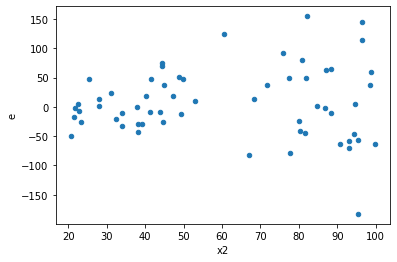

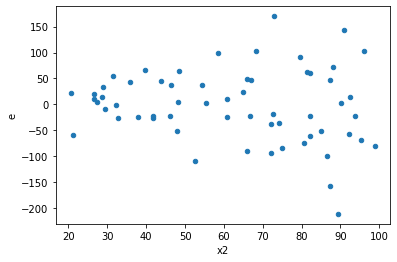

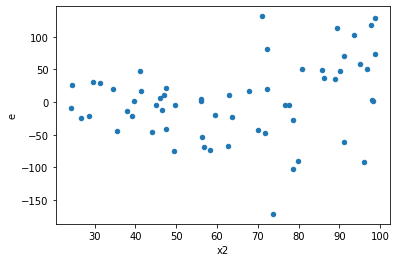

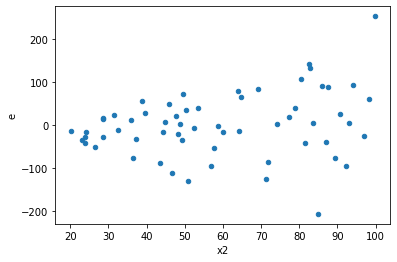

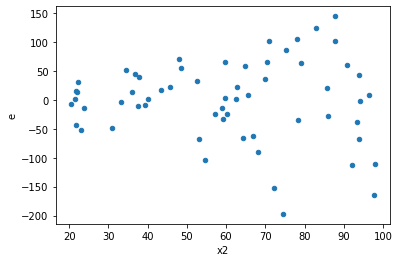

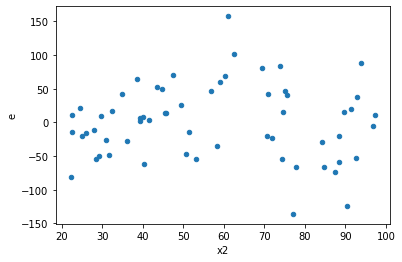

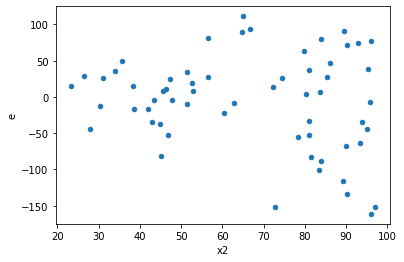

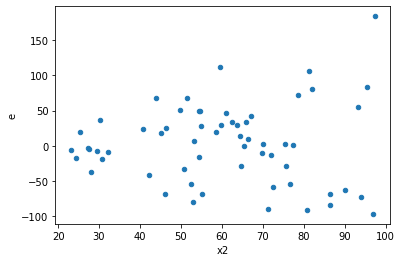

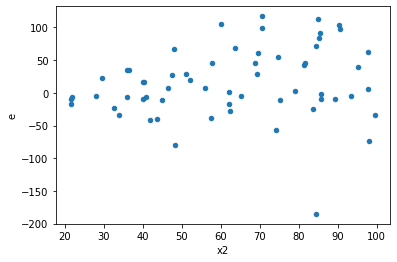

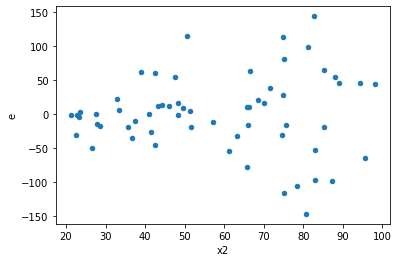

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,41716.01868173769,124124.39283622862,1986.477080082747,5910.685373153744,2.9754611479874375,0.015857330158313365,0.9920713349208433,0.007928665079156683,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,21366.435563417574,99062.40465649238,1017.449312543694,4717.257364594875,4.636356137291403,0.0008871279508562147,0.9995564360245719,0.0004435639754281073,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,28679.423787170115,232521.6036845568,1365.6868470081008,11072.457318312228,8.107610718056913,1.120523789488459e-05,0.9999943973810526,5.602618947442295e-06,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,39995.26539297721,155868.52438445773,1904.5364472846293,7422.310684974178,3.8971743993434473,0.0029451775528754887,0.9985274112235623,0.0014725887764377443,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,27598.582092139757,190781.14441770318,1314.2181948637979,9084.816400843009,6.912715435190376,4.182081900472312e-05,0.9999790895904976,2.091040950236156e-05,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,45729.72335588955,183880.872246269,2177.605874089979,8756.232011727096,4.021036182861292,0.002387832373481391,0.9988060838132593,0.0011939161867406956,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,22328.422008344398,192777.0942719532,1063.2581908735428,9179.86163199777,8.633708830830502,6.57899277478613e-06,0.9999967105036126,3.289496387393065e-06,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,46785.46080820198,136488.4349738616,2227.879086104856,6499.4492844696,2.917325866114666,0.017768325397852003,0.991115837301074,0.008884162698926001,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,15722.091280876344,164375.03363350983,748.671013375064,7827.3825539766585,10.4550362096834,1.2478430500006965e-06,0.999999376078475,6.239215250003483e-07,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,41716.01868173769,124124.39283622862,1986.477080082747,5910.685373153744,2.9754611479874375,0.015857330158313365,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,21366.435563417574,99062.40465649238,1017.449312543694,4717.257364594875,4.636356137291403,0.0008871279508562147,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,28679.423787170115,232521.6036845568,1365.6868470081008,11072.457318312228,8.107610718056913,1.120523789488459e-05,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,39995.26539297721,155868.52438445773,1904.5364472846293,7422.310684974178,3.8971743993434473,0.0029451775528754887,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,27598.582092139757,190781.14441770318,1314.2181948637979,9084.816400843009,6.912715435190376,4.182081900472312e-05,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,45729.72335588955,183880.872246269,2177.605874089979,8756.232011727096,4.021036182861292,0.002387832373481391,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,22328.422008344398,192777.0942719532,1063.2581908735428,9179.86163199777,8.633708830830502,6.57899277478613e-06,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,46785.46080820198,136488.4349738616,2227.879086104856,6499.4492844696,2.917325866114666,0.017768325397852003,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,15722.091280876344,164375.03363350983,748.671013375064,7827.3825539766585,10.4550362096834,1.2478430500006965e-06,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    916
Reject005=1 : Homoscedasticity       84
Name: Result_test, dtype: int64